<h1 style="text-align: center; font-size: 40px;">Housing Price Prediction</h1>



Objective: The goal of this project is to predict the 2019 property tax payment of an unknown city in the United States with 100,000 units.

Loading Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

# Load data
training_data = pd.read_csv("assessment_history_train.csv", na_values=["NA", ""])
test_data = pd.read_csv("assessment_history_test.csv", na_values=["NA", ""])
building_2019 = pd.read_csv("building_details_2019.csv", na_values=["NA", ""])
building_2018 = pd.read_csv("building_details_2018.csv", na_values=["NA", ""])
solution=pd.read_csv("solution.csv", na_values=["NA", ""])

C:\Users\etroi\AppData\Local\Temp\ipykernel_28688\1112192099.py:3: DtypeWarning: Columns (21,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("assessment_history_test.csv", na_values=["NA", ""])


In [3]:
test_data.head()

,acct,building_area_2015,land_area_2015,building_area_2016,land_area_2016,building_area_2017,land_area_2017,building_area_2018,land_area_2018,region,...,protested_2016,assessed_2017,protested_2017,assessed_2018,protested_2018,protested_2019,school_dist,zone,subneighborhood,neighborhood
0,bb75f25168addc1117840b10c0fd6cd0c2a7b7c6,2537.0,5000.0,2537.0,5000.0,2537.0,5000.0,2537.0,5000.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,360475.0,False,360475.0,False,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
1,8def0ccceda200b673872a8a9367644767989f3b,1496.0,5000.0,1496.0,5000.0,1496.0,5000.0,1496.0,5000.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,128297.0,False,128297.0,False,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
2,ca33e57b3b13e843909f4b6cbd9a3410387bd45a,1508.0,6250.0,1508.0,6250.0,1508.0,6250.0,1508.0,6250.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,254430.0,True,254430.0,True,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
3,3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55,1670.0,6250.0,1670.0,6250.0,1670.0,6250.0,1670.0,6250.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,144778.0,False,144778.0,False,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
4,63facf82adbae10b23f7fabc93188c95bd832f51,1944.0,1765.0,1944.0,1765.0,1944.0,1765.0,1944.0,1765.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,True,299000.0,True,299000.0,True,True,1,dbc07ca46df4d92a2f442e606b88f713a3ce17b0,a05e04bd0670926829bb3a522eb622388c476059,afacbde0e748405899759d1b1abda5d9fce45151


In [4]:
test_data.shape

(418858, 33)

In [5]:
training_data.head()

,acct,building_area_2015,land_area_2015,building_area_2016,land_area_2016,building_area_2017,land_area_2017,building_area_2018,land_area_2018,region,...,protested_2017,assessed_2018,protested_2018,assessed_2019,protested_2019,school_dist,zone,subneighborhood,neighborhood,TARGET
0,cb6434705a05b139cb63994aa2a194b226b9e750,1853.0,4263.0,1853.0,4263.0,1853.0,4263.0,1853.0,4263.0,05946c0909f5c241db6179659dc763e14544cf75,...,True,122500.0,True,145000,True,8.0,1b2fc12a8ee5147b030dae24f76bfb63bf401fdd,9bd56df07606b41647719f2022859ef0571cf82c,78bde8025e65c00938c9f5a63f652c33c7b7fc61,145000
1,965bbe53f6f63e4853b5a30ba28cf016d489de80,1282.0,6780.0,1282.0,6780.0,1282.0,6780.0,1282.0,6780.0,7fb552ebc782591a0e4a0b770897f05ddc782d7d,...,False,92171.0,False,87291,False,9.0,34827051b895693d5256b50bbfd93d1edfcc9e57,25f65e19a463ff57232c7dfcde28e5da1e1daf2e,5495e69e361f526f9e9cd261fa962d6855a25e1d,87291
2,c68f351c68aa385ec1e8c866e5f8f27486894ca1,1705.0,11400.0,1705.0,11400.0,1705.0,11400.0,1705.0,11400.0,6bbed0508643ceb1fc53fd0d87d5bd5692e63f59,...,False,93038.0,False,93038,False,1.0,08900a31f38af1b7cc90edbf7fe0a51b223b7cea,b7a148094f9e45c93317ecd470468158badfdd67,95b716d0ecd06b5817ac70061b3891e9b2b1b9df,93038
3,dcd1fedd707398670790d4e2dc2f3959755644bc,1525.0,6050.0,1525.0,6050.0,1525.0,6050.0,1525.0,6050.0,05946c0909f5c241db6179659dc763e14544cf75,...,False,154463.0,True,153325,True,8.0,80d118e9664f13333ec56471233757aae3670248,3e4238a9dede4db257f8db619ba3ae59dae8c22b,2cf01a6f31e9209edc33e04502c3ac792ccfe483,153325
4,e6945b0343e266eb516cbd035093aa8f111cf21f,2873.0,12371.0,2873.0,12371.0,2873.0,12371.0,2873.0,12371.0,8313aed7a2170658379a4543432d30a7a4c9c0f9,...,False,167732.0,False,192413,False,24.0,01607e23a50f715d7b6156391072890485810e80,2230753ca14dfdaf45cadf8b44b39d64868395f2,dec42cf689b88bc6c3376b744ba1eef6241bb72e,192413


In [6]:
training_data.shape

(628287, 37)

In [7]:
building_2019.head()

,acct,floor_area_primary,floor_area_upper,floor_area_lower,garage_area,porch_area,deck_area,mobile_home_area,floors,half_bath,...,year_built,year_remodeled,building_condition,foundation_type,grade,has_cooling,has_heat,physical_condition,exterior_walls,year
0,bb75f25168addc1117840b10c0fd6cd0c2a7b7c6,1658,879,0,0,266,0,0,2.0,1,...,2004.0,0.0,Fair,Slab,B-,True,True,Average,Stucco,2019.0
1,5dd766a35cebbcbfa063316adb679131dbb9f92c,912,0,0,0,48,0,0,2.0,0,...,1949.0,0.0,Fair,Crawl Space,D-,False,False,Fair,Concrete Block,2019.0
2,8def0ccceda200b673872a8a9367644767989f3b,1496,0,0,0,182,0,0,1.0,0,...,1917.0,0.0,Poor,Crawl Space,D,False,False,Poor,Concrete Block,2019.0
3,7592093bcff4a8463064ccc1ead39e6dbdb819c9,1517,1870,0,529,174,0,0,2.0,1,...,2015.0,0.0,Average,Slab,B+,True,True,Average,Stucco,2019.0
4,ca33e57b3b13e843909f4b6cbd9a3410387bd45a,1508,0,0,420,0,0,0,1.0,0,...,2003.0,0.0,Fair,Slab,C,True,True,Average,Brick Masonry and Concrete Block,2019.0


In [8]:
building_2019.shape

(1046882, 27)

In [9]:
training_data.dtypes

acct                    object
building_area_2015     float64
land_area_2015         float64
building_area_2016     float64
land_area_2016         float64
building_area_2017     float64
land_area_2017         float64
building_area_2018     float64
land_area_2018         float64
region                  object
building_area_2019       int64
land_area_2019           int64
building_value_2015    float64
land_value_2015        float64
building_value_2016    float64
land_value_2016        float64
building_value_2017    float64
land_value_2017        float64
building_value_2018    float64
land_value_2018        float64
building_value_2019      int64
land_value_2019          int64
assessed_2015          float64
protested_2015          object
assessed_2016          float64
protested_2016          object
assessed_2017          float64
protested_2017          object
assessed_2018          float64
protested_2018          object
assessed_2019            int64
protested_2019            bool
school_d

In [10]:
test_data.dtypes

acct                    object
building_area_2015     float64
land_area_2015         float64
building_area_2016     float64
land_area_2016         float64
building_area_2017     float64
land_area_2017         float64
building_area_2018     float64
land_area_2018         float64
region                  object
building_area_2019       int64
land_area_2019           int64
building_value_2015    float64
land_value_2015        float64
building_value_2016    float64
land_value_2016        float64
building_value_2017    float64
land_value_2017        float64
building_value_2018    float64
land_value_2018        float64
assessed_2015          float64
protested_2015          object
assessed_2016          float64
protested_2016          object
assessed_2017          float64
protested_2017          object
assessed_2018          float64
protested_2018          object
protested_2019            bool
school_dist              int64
zone                    object
subneighborhood         object
neighbor

In [11]:
building_2019.dtypes

acct                    object
floor_area_primary       int64
floor_area_upper         int64
floor_area_lower         int64
garage_area              int64
porch_area               int64
deck_area                int64
mobile_home_area         int64
floors                 float64
half_bath                int64
full_bath                int64
total_rooms              int64
bedrooms                 int64
fireplaces               int64
elevator                  bool
quality                 object
quality_description     object
year_built             float64
year_remodeled         float64
building_condition      object
foundation_type         object
grade                   object
has_cooling             object
has_heat                object
physical_condition      object
exterior_walls          object
year                   float64
dtype: object

Distribution of Target or Value Columns

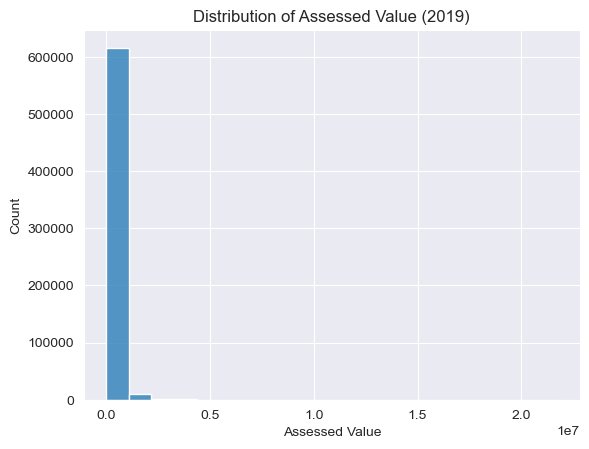

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(training_data['assessed_2019'], bins=20)
plt.title("Distribution of Assessed Value (2019)")
plt.xlabel("Assessed Value")
plt.ylabel("Count")
plt.show()


Filter Out Extreme Outliers (Zoom In)

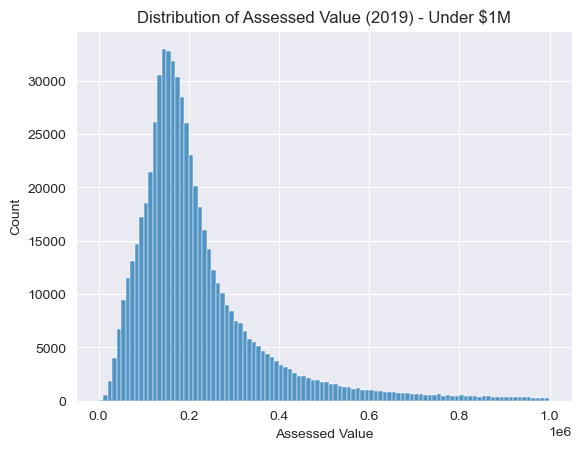

In [13]:
# Filter out extreme high-end values
subset = training_data[training_data['assessed_2019'] < 1_000_000]

sns.histplot(subset['assessed_2019'], bins=100)
plt.title("Distribution of Assessed Value (2019) - Under $1M")
plt.xlabel("Assessed Value")
plt.ylabel("Count")
plt.show()


Correlation Heatmap (Numerical Features Only)

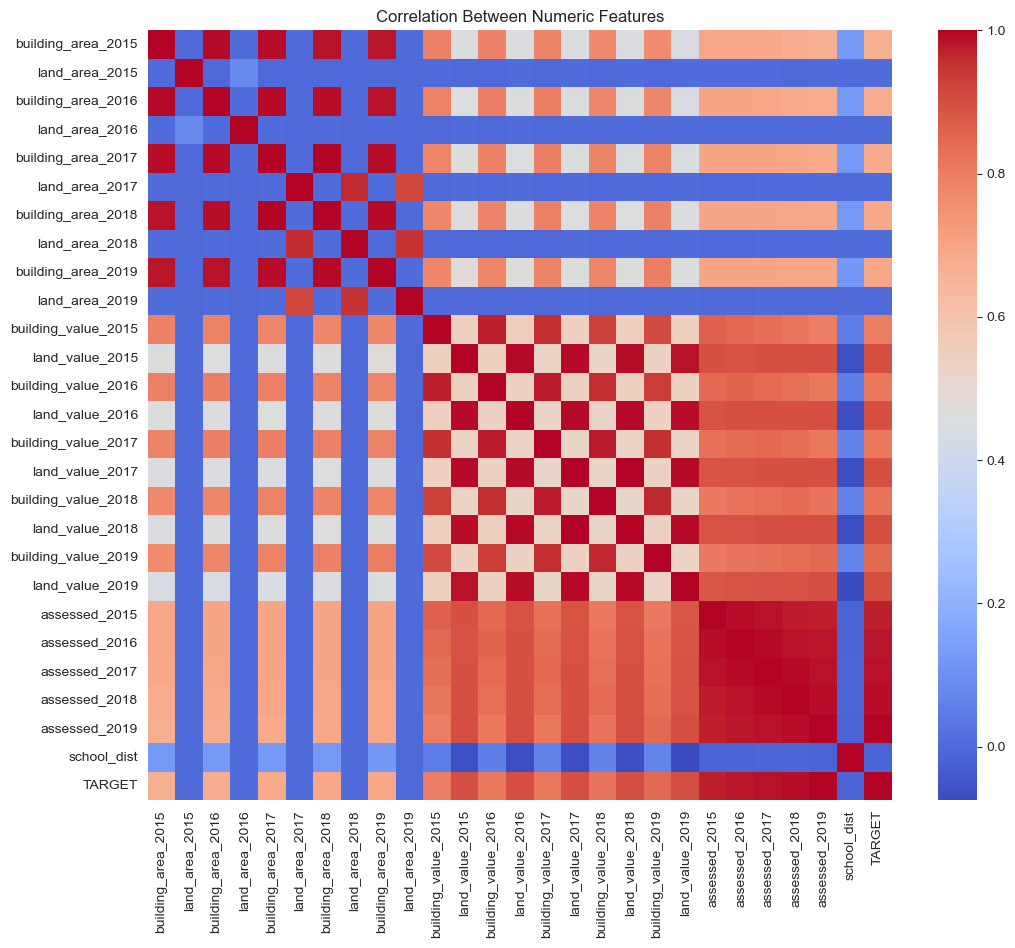

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = training_data.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols, cmap='coolwarm', annot=False)
plt.title("Correlation Between Numeric Features")
plt.show()


Boxplots for Categorical vs Numeric

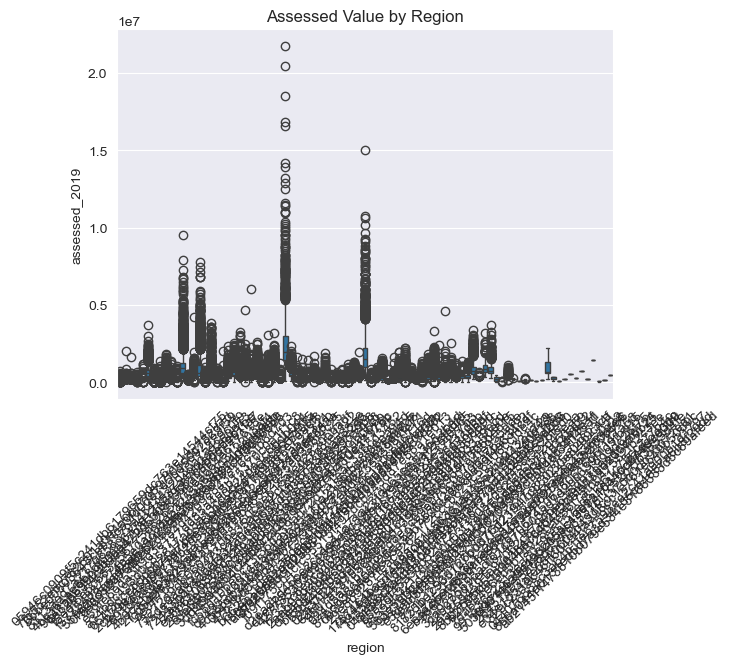

In [15]:
sns.boxplot(x='region', y='assessed_2019', data=training_data)
plt.title("Assessed Value by Region")
plt.xticks(rotation=45)
plt.show()


Bar Plot of Protest Rates

Text(0.5, 1.0, 'Protest Frequency (2019)')

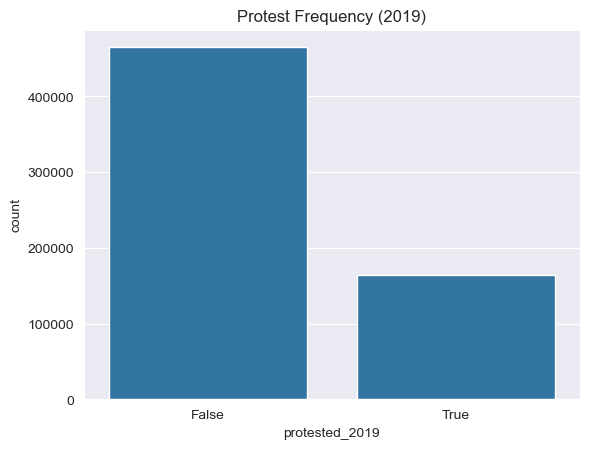

In [16]:
sns.countplot(data=training_data, x='protested_2019')
plt.title("Protest Frequency (2019)")

Rename and join building data

In [17]:

# Rename and join building data
building_2019_renamed = building_2019.rename(columns=lambda x: f"{x}_2019" if x != "acct" else x)
building_2018_renamed = building_2018.rename(columns=lambda x: f"{x}_2018" if x != "acct" else x)

training_data = training_data.merge(building_2019_renamed, on="acct", how="left") \
                            .merge(building_2018_renamed, on="acct", how="left")

test_data = test_data.merge(building_2019_renamed, on="acct", how="left") \
                    .merge(building_2018_renamed, on="acct", how="left")

Feature engineering

In [18]:

# Feature engineering
training_data['year_remodeled_2019'] = np.where(training_data['year_remodeled_2019'] == 2019, 1, 0)
training_data['density_2019'] = training_data['building_area_2019'] / training_data['land_area_2019']

test_data['year_remodeled_2019'] = np.where(test_data['year_remodeled_2019'] == 2019, 1, 0)
test_data['density_2019'] = test_data['building_area_2019'] / test_data['land_area_2019']

In [19]:
training_data.info

<bound method DataFrame.info of                                             acct  building_area_2015  \
0       cb6434705a05b139cb63994aa2a194b226b9e750              1853.0   
1       965bbe53f6f63e4853b5a30ba28cf016d489de80              1282.0   
2       c68f351c68aa385ec1e8c866e5f8f27486894ca1              1705.0   
3       dcd1fedd707398670790d4e2dc2f3959755644bc              1525.0   
4       e6945b0343e266eb516cbd035093aa8f111cf21f              2873.0   
...                                          ...                 ...   
628282  096ae9cd01609cb0893f2ef91dc757824e4e84f2              1244.0   
628283  0b477a421bd606cc68cd53bc094e074870bdb335              3258.0   
628284  c09bb8493d33797362fd894c49cf7d4e02509a8a              1019.0   
628285  2e4ed275ab26ed4aefc2e80bc1db5b5cb7cae88a              1587.0   
628286  5eccd04f798d31921aa33d411b838a99148619d0              1124.0   

        land_area_2015  building_area_2016  land_area_2016  \
0               4263.0              1853.

In [20]:
training_data.dtypes

acct                        object
building_area_2015         float64
land_area_2015             float64
building_area_2016         float64
land_area_2016             float64
                            ...   
has_heat_2018               object
physical_condition_2018     object
exterior_walls_2018         object
year_2018                  float64
density_2019               float64
Length: 90, dtype: object

In [21]:
features = training_data.columns.difference(['TARGET', 'acct', 'ACCOUNT']).tolist()

In [22]:
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
features = training_data.columns.difference(['TARGET', 'acct', 'ACCOUNT']).tolist()
X = training_data[features]
y = training_data['TARGET']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Encode categorical columns (objects → codes)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes
        X_test[col] = X_test[col].astype('category').cat.codes


In [23]:
for col in features:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes
        X_test[col] = X_test[col].astype('category').cat.codes


In [24]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [25]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['protested_2019']


In [26]:
training_data["protested_2019"]

0          True
1         False
2         False
3          True
4         False
          ...  
628282    False
628283    False
628284    False
628285    False
628286    False
Name: protested_2019, Length: 628287, dtype: bool

In [27]:
training_data['protested_2019'] = training_data['protested_2019'].astype(int)


In [28]:
print(training_data['protested_2019'].unique())
# Output: [1 0]


[1 0]


In [29]:
from sklearn.model_selection import train_test_split

X = training_data[features]
y = training_data['TARGET']



In [30]:
# Only apply to numeric columns
numeric_X_train = X_train.select_dtypes(include=[np.number])

print(np.isinf(numeric_X_train).any().any())   # Check for inf
print(np.isnan(numeric_X_train).any().any())   # Check for NaN


True
False


In [31]:
import numpy as np

# Step 1: Replace inf and -inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Replace NaN with column mean (or 0 if you prefer)
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)


In [32]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols.tolist())


['protested_2019']


In [33]:
for col in non_numeric_cols:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes


In [34]:
import numpy as np

# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with column means (or 0, if you prefer)
X_train.fillna(X_train.mean(), inplace=True)


            feature  importance
4     assessed_2019    0.992607
3     assessed_2018    0.002241
2     assessed_2017    0.002056
1     assessed_2016    0.000750
58  land_value_2018    0.000467
59  land_value_2019    0.000462
56  land_value_2016    0.000274
0     assessed_2015    0.000195
55  land_value_2015    0.000123
50   land_area_2015    0.000122


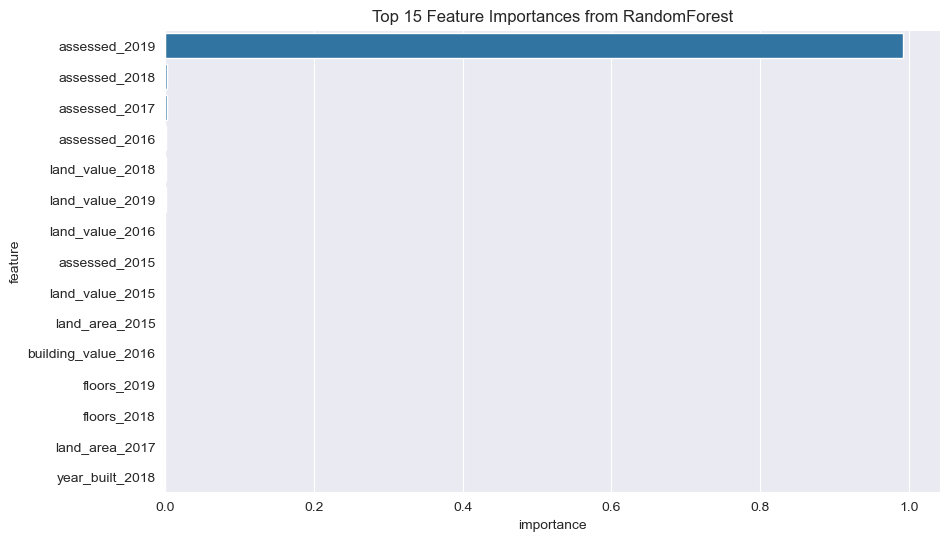

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train model if not already trained
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'feature': features,  # Make sure `features` is a list of column names
    'importance': final_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Print top 10
print(importances.head(10))

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(15), x='importance', y='feature')
plt.title("Top 15 Feature Importances from RandomForest")
plt.show()



Convert categorical columns

In [36]:

# Convert categorical columns
factor_cols = ['assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'land_value_2015', 'land_value_2016', 'land_value_2018', 'land_area_2015', 'land_area_2017',
    'building_value_2016',
    'floors_2018', 'floors_2019',
    'year_built_2018']

# Step 1: Identify categorical columns, excluding 'acct'
factor_cols = training_data.select_dtypes(include=['object', 'category']).columns
factor_cols = [col for col in factor_cols if col != 'acct']  # exclude 'acct'

# Step 2: Convert to category and encode using .cat.codes
for col in factor_cols:
    combined = pd.concat([training_data[col], test_data[col]], axis=0).astype('category')
    training_data[col] = pd.Categorical(training_data[col], categories=combined.cat.categories).codes
    test_data[col] = pd.Categorical(test_data[col], categories=combined.cat.categories).codes



Split 80/20

In [37]:

# Split 80/20
train_split, valid_split = train_test_split(training_data, test_size=0.2, random_state=123)

In [38]:

# Define features and target
features = ['assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'land_value_2015', 'land_value_2016', 'land_value_2018', 'land_area_2015', 'land_area_2017',
    'building_value_2016',
    'floors_2018', 'floors_2019',
    'year_built_2018']

target = 'TARGET'

In [39]:
print(train_split[features].dtypes)  # Check feature column data types
print(train_split[target].dtypes)  # Check target column data type


assessed_2015          float64
assessed_2016          float64
assessed_2017          float64
assessed_2018          float64
land_value_2015        float64
land_value_2016        float64
land_value_2018        float64
land_area_2015         float64
land_area_2017         float64
building_value_2016    float64
floors_2018            float64
floors_2019            float64
year_built_2018        float64
dtype: object
int64


Train model on training split

In [40]:

# Train model on training split
model_split = RandomForestRegressor(n_estimators=100, random_state=123)
model_split.fit(train_split[features], train_split[target])

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:

# Predict on validation set
val_preds = model_split.predict(valid_split[features])
val_rmse = np.sqrt(mean_squared_error(valid_split[target], val_preds))
val_r2 = r2_score(valid_split[target], val_preds)

print(f"Validation RMSE: {val_rmse}")
print(f"Validation R²: {val_r2}")

Validation RMSE: 45861.369131536914
Validation R²: 0.978554733936436


Train final model on full training data

In [42]:

# Train final model on full training data
final_model = RandomForestRegressor(n_estimators=100, random_state=123)
final_model.fit(training_data[features], training_data[target])

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict on test set

In [43]:

# Predict on test set
test_data['TARGET_pred'] = final_model.predict(test_data[features])

In [44]:

# Feature importance
importances = pd.DataFrame({
    'feature': features,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)
print(importances)

                feature  importance
3         assessed_2018    0.959260
2         assessed_2017    0.016147
4       land_value_2015    0.004418
0         assessed_2015    0.004105
1         assessed_2016    0.003568
6       land_value_2018    0.002674
12      year_built_2018    0.002301
5       land_value_2016    0.001949
9   building_value_2016    0.001508
8        land_area_2017    0.001223
7        land_area_2015    0.001192
11          floors_2019    0.000852
10          floors_2018    0.000805


In [45]:
solution=pd.read_csv("solution.csv", na_values=["NA", ""])

In [46]:
solution

,ACCOUNT,TARGET
0,bb75f25168addc1117840b10c0fd6cd0c2a7b7c6,360475
1,8def0ccceda200b673872a8a9367644767989f3b,128297
2,ca33e57b3b13e843909f4b6cbd9a3410387bd45a,254430
3,3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55,144778
4,63facf82adbae10b23f7fabc93188c95bd832f51,299000
...,...,...
418853,24847d36c333ab3376848ee1bda74916286a2a4b,178309
418854,62ba19f1655097ac9cc8682aec435d22a653bfa0,486924
418855,552b5300d14369d8fd792ea6228dfa683014b2f5,418439
418856,290d351d16d00e79e89dc5404412f07769f40038,92267


In [ ]:
test_data.rename(columns={'acct': 'ACCOUNT'}, inplace=True)

print(test_data.columns.tolist())



In [56]:
print(solution.columns.tolist())

['ACCOUNT', 'TARGET']


In [57]:
solution["ACCOUNT"].isnull().sum()

np.int64(0)

In [58]:
# Convert both to string to ensure consistent merge key
test_data['ACCOUNT'] = test_data['ACCOUNT'].astype(str)
solution['ACCOUNT'] = solution['ACCOUNT'].astype(str)

# Now you can merge safely
comparison = test_data.merge(solution, on='ACCOUNT', how='inner')

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(comparison['TARGET'], comparison['TARGET_pred']))
r2 = r2_score(comparison['TARGET'], comparison['TARGET_pred'])

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



RMSE: 44982.65
R²: 0.9806


In [59]:
# Check how many ACCOUNTs are in each
print("test_data ACCOUNTs:", test_data['ACCOUNT'].nunique())
print("solution ACCOUNTs:", solution['ACCOUNT'].nunique())

# Check how many match
matching_accounts = set(test_data['ACCOUNT']) & set(solution['ACCOUNT'])
print("Matching ACCOUNTs:", len(matching_accounts))


test_data ACCOUNTs: 418858
solution ACCOUNTs: 418858
Matching ACCOUNTs: 418858


In [60]:
print("test_data ACCOUNT sample:", test_data['ACCOUNT'].astype(str).head(3).tolist())
print("solution ACCOUNT sample:", solution['ACCOUNT'].astype(str).head(3).tolist())


test_data ACCOUNT sample: ['bb75f25168addc1117840b10c0fd6cd0c2a7b7c6', '8def0ccceda200b673872a8a9367644767989f3b', 'ca33e57b3b13e843909f4b6cbd9a3410387bd45a']
solution ACCOUNT sample: ['bb75f25168addc1117840b10c0fd6cd0c2a7b7c6', '8def0ccceda200b673872a8a9367644767989f3b', 'ca33e57b3b13e843909f4b6cbd9a3410387bd45a']


In [61]:
print("Solution columns:", solution.columns.tolist())
print("Test data columns:", test_data.columns.tolist())


Solution columns: ['ACCOUNT', 'TARGET']
Test data columns: ['ACCOUNT', 'building_area_2015', 'land_area_2015', 'building_area_2016', 'land_area_2016', 'building_area_2017', 'land_area_2017', 'building_area_2018', 'land_area_2018', 'region', 'building_area_2019', 'land_area_2019', 'building_value_2015', 'land_value_2015', 'building_value_2016', 'land_value_2016', 'building_value_2017', 'land_value_2017', 'building_value_2018', 'land_value_2018', 'assessed_2015', 'protested_2015', 'assessed_2016', 'protested_2016', 'assessed_2017', 'protested_2017', 'assessed_2018', 'protested_2018', 'protested_2019', 'school_dist', 'zone', 'subneighborhood', 'neighborhood', 'floor_area_primary_2019', 'floor_area_upper_2019', 'floor_area_lower_2019', 'garage_area_2019', 'porch_area_2019', 'deck_area_2019', 'mobile_home_area_2019', 'floors_2019', 'half_bath_2019', 'full_bath_2019', 'total_rooms_2019', 'bedrooms_2019', 'fireplaces_2019', 'elevator_2019', 'quality_2019', 'quality_description_2019', 'year_bu

Finance Approach

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [63]:

# Step 1: Define features and target
features = [
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]

target = 'TARGET'  # Replace this with your actual target column name

In [64]:

# Step 2: Drop rows with NaNs in features or target
train_split_clean = train_split.dropna(subset=features + [target])

# Step 3: Replace inf/-inf with NaN and drop them too
train_split_clean = train_split_clean.replace([np.inf, -np.inf], np.nan)
train_split_clean = train_split_clean.dropna(subset=features + [target])

# Step 4: One-hot encode categorical variables
df_model = pd.get_dummies(train_split_clean[features + [target]], drop_first=True)

# Step 5: Separate predictors and response
X = df_model.drop(columns=[target])
y = df_model[target]

# Step 6: Final safety check (numeric columns only)
X_numeric = X.select_dtypes(include=[np.number])
assert not np.isinf(X_numeric.values).any(), "❌ Still contains inf values"
assert not np.isnan(X_numeric.values).any(), "❌ Still contains NaN values"

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [65]:

# Step 8: Train Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=123)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:

# Step 9: Predict and evaluate
y_pred = model_rf.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:,.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 46,175.51
✅ R² Score: 0.9809


In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Step 0: Define features
features = [
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]

# Step 1: Prepare test data (ensure 'ACCOUNT' is present)
test_data_clean = test_data[features + ['ACCOUNT']].copy()

# Step 2: Replace inf/-inf with NaN
test_data_clean = test_data_clean.replace([np.inf, -np.inf], np.nan)

# Step 3: Group-wise mean imputation by subneighborhood
for col in features:
    if test_data_clean[col].isna().any():
        test_data_clean[col] = test_data_clean.groupby('subneighborhood')[col].transform(
            lambda x: x.fillna(x.mean())
        )

# Step 4: One-hot encode categorical variables
test_encoded = pd.get_dummies(test_data_clean[features], drop_first=True)

# Step 5: Align test columns with training columns
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)

# Step 6: Predict with trained model
test_preds = model_rf.predict(test_encoded)

# Step 7: Load ground truth solution
solution_df = pd.read_csv("solution.csv")  # contains 'ACCOUNT' and 'TARGET'

# Step 8: Merge predictions with solution on 'ACCOUNT'
test_data_clean['Predicted'] = test_preds
eval_df = pd.merge(
    test_data_clean[['ACCOUNT', 'Predicted']],
    solution_df[['ACCOUNT', 'TARGET']],
    on='ACCOUNT'
)

# Step 9: Evaluate accuracy
rmse = np.sqrt(mean_squared_error(eval_df['TARGET'], eval_df['Predicted']))
r2 = r2_score(eval_df['TARGET'], eval_df['Predicted'])

# Step 10: Print results
print("📊 Prediction Evaluation Results:")
print(f"✅ RMSE: {rmse:,.2f}")
print(f"✅ R² Score: {r2:.4f}")


📊 Prediction Evaluation Results:
✅ RMSE: 45,064.71
✅ R² Score: 0.9806


Compare Regression Models

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Step 0: Define all possible features and target
features = [
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]
target = 'TARGET'
cat_cols = ['region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
            'quality_2019', 'physical_condition_2019', 'grade_2019']

# Step 1: Clean and filter training data
df = training_data.copy()
df = df.replace([np.inf, -np.inf], np.nan)

# Step 2: Keep only features that exist in the training data
features = [col for col in features if col in df.columns]
cat_cols = [col for col in cat_cols if col in df.columns]

# Optional: notify if some features were missing
missing_cols = set([
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]) - set(features)
if missing_cols:
    print("⚠️ Missing columns skipped:", missing_cols)

# Step 3: Drop rows with missing values in features/target
df = df.dropna(subset=features + [target])

# Step 4: Split train/test
X = df[features].copy()
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



⚠️ Missing columns skipped: {'density_2019', 'physical_condition_2019', 'year_remodeled_2019', 'grade_2019', 'quality_2019'}


Train Random Forest

In [8]:
# Encode categorical as numeric codes
X_rf_train = X_train.copy()
X_rf_test = X_test.copy()
for col in cat_cols:
    X_rf_train[col] = X_rf_train[col].astype('category').cat.codes
    X_rf_test[col] = X_rf_test[col].astype('category').cat.codes

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_train)
rf_pred = rf_model.predict(X_rf_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(rf_rmse)
print(rf_r2)

38418.56785755256
0.985802905588534


Train XGBoost

In [16]:
# Example: Convert boolean or object True/False to 1/0
for col in X_rf_train.columns:
    if X_rf_train[col].dtype == 'object' or X_rf_train[col].dtype == 'bool':
        X_rf_train[col] = X_rf_train[col].astype('category').cat.codes
        X_rf_test[col] = X_rf_test[col].astype('category').cat.codes



xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_rf_train, y_train)
xgb_pred = xgb_model.predict(X_rf_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print(xgb_rmse)
print(xgb_r2)


74553.13273095907
0.9465375542640686


Train LightGBM with Native Categorical Support

In [17]:
X_lgb_train = X_train.copy()
X_lgb_test = X_test.copy()

# Convert declared categorical columns to category dtype
for col in cat_cols:
    X_lgb_train[col] = X_lgb_train[col].astype('category')
    X_lgb_test[col] = X_lgb_test[col].astype('category')

# Convert remaining object columns to category codes
for col in X_lgb_train.columns:
    if X_lgb_train[col].dtype == 'object' and col not in cat_cols:
        X_lgb_train[col] = X_lgb_train[col].astype('category').cat.codes
        X_lgb_test[col] = X_lgb_test[col].astype('category').cat.codes

# Train LightGBM
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_lgb_train, y_train, categorical_feature=cat_cols)

# Predict and evaluate
lgb_pred = lgb_model.predict(X_lgb_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_r2 = r2_score(y_test, lgb_pred)

print(f"✅ LightGBM RMSE: {lgb_rmse:,.2f}")
print(f"✅ LightGBM R² Score: {lgb_r2:.4f}")



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8979
[LightGBM] [Info] Number of data points in the train set: 471965, number of used features: 15
[LightGBM] [Info] Start training from score 250328.262208
✅ LightGBM RMSE: 60,889.53
✅ LightGBM R² Score: 0.9643
